In [6]:
import os
import json
from model_utils import visualize_detections

img_train_dir = "data/dataset_v3/train/images"
img_val_dir = "data/dataset_v3/val/images"
labels_train_dir = "data/dataset_v3/train/labels"
labels_val_dir = "data/dataset_v3/val/labels"

with open ("pipeline_data/dicts/detect_classes_v3.json", "r") as f:
    detection_dict = json.load(f)


In [7]:
### moving val files to train folder
for filename in os.listdir(img_val_dir):
    img_src_path = os.path.join(img_val_dir, filename)
    img_dst_path = os.path.join(img_train_dir, filename)
    os.rename(img_src_path, img_dst_path)
for filename in os.listdir(labels_val_dir):
    label_src_path = os.path.join(labels_val_dir, filename)
    label_dst_path = os.path.join(labels_train_dir, filename)
    os.rename(label_src_path, label_dst_path)

### useful functions

In [8]:
def change_class(label_folder, old_class, new_class):
    files_changed = 0
    for label_file in os.listdir(label_folder):
        if label_file.endswith('.txt'):
            with open(os.path.join(label_folder, label_file), 'r') as f:
                lines = f.readlines()
            modified = False
            new_lines = []
            for line in lines:
                parts = line.strip().split()
                class_id = parts[0]
                if class_id == old_class:
                    class_id = new_class
                    modified = True
                new_line = ' '.join([class_id] + parts[1:]) + '\n'
                new_lines.append(new_line)

            if modified:
                files_changed += 1
                with open(os.path.join(label_folder, label_file), 'w') as f:
                    f.writelines(new_lines)
    print(f"Changed class from '{old_class}' to '{new_class}' in {files_changed} files.")

def synchronize_labels_and_images(img_dir, label_dir):
    for label_file in os.listdir(label_dir):
        img_file = label_file.replace('.txt', '.jpg')
        img_path = os.path.join(img_dir, img_file)
        if not os.path.exists(img_path):
            os.remove(os.path.join(label_dir, label_file))

    for img_file in os.listdir(img_dir):
        label_file = img_file.replace('.jpg', '.txt')
        label_path = os.path.join(label_dir, label_file)
        if not os.path.exists(label_path):
            os.remove(os.path.join(img_dir, img_file))

In [1]:
#### class id to class name #### 
def id_to_class_name(labels_dir, id_to_name_dict):
    files_changed = 0
    for label_file in os.listdir(labels_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(labels_dir, label_file), 'r') as f:
                lines = f.readlines()

            new_lines = []
            for line in lines:
                parts = line.strip().split()
                class_id = parts[0]
                class_name = id_to_name_dict[class_id]
                new_line = ' '.join([class_name] + parts[1:]) + '\n'
                new_lines.append(new_line)
            
            with open(os.path.join(labels_dir, label_file), 'w') as f:
                f.writelines(new_lines)
                files_changed += 1
    print(f"Converted class IDs to names in {files_changed} files.")

#### class name to class id ####

def class_name_to_id(labels_dir, name_to_id_dict):
    files_changed = 0
    for label_file in os.listdir(labels_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(labels_dir, label_file), 'r') as f:
                lines = f.readlines()

            new_lines = []
            for line in lines:
                parts = line.strip().split()
                class_name = parts[0]
                class_id = str(name_to_id_dict[class_name])
                new_line = ' '.join([class_id] + parts[1:]) + '\n'
                new_lines.append(new_line)
            
            with open(os.path.join(labels_dir, label_file), 'w') as f:
                f.writelines(new_lines)
                files_changed += 1
    print(f"Converted class names to IDs in {files_changed} files.")


In [12]:
def remove_class(labels_dir, class_name_to_remove):
    files_changed = 0
    for label_file in os.listdir(labels_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(labels_dir, label_file), 'r') as f:
                lines = f.readlines()

            new_lines = []
            modified = False
            for line in lines:
                parts = line.strip().split()
                class_name = parts[0]
                if class_name != class_name_to_remove:
                    new_lines.append(line)
                else:
                    modified = True
            if modified:
                files_changed += 1
                with open(os.path.join(labels_dir, label_file), 'w') as f:
                    f.writelines(new_lines)

    print(f"Removed class name '{class_name_to_remove}' from {files_changed} files.")

In [11]:
id_to_name = detection_dict

name_to_id = {v: int(k) for k, v in id_to_name.items()}

print(id_to_name["0"])
print(name_to_id["beef"])

id_to_class_name(labels_train_dir, id_to_name)

almonds
8
Converted class IDs to names in 23994 files.


In [13]:
classes_to_remove = ["grits-polenta-maize-flour", "witloof-chicory"]

for class_name in classes_to_remove:
    remove_class(labels_train_dir, class_name)

Removed class name 'grits-polenta-maize-flour' from 215 files.
Removed class name 'witloof-chicory' from 234 files.


In [14]:
change_class(labels_train_dir, "mushrooms", "mushroom")  

Changed class from 'mushrooms' to 'mushroom' in 210 files.


In [18]:
with open ("pipeline_data/dicts/detect_classes_v4.json", "r") as f:
    detection_dict_v4 = json.load(f)

new_id_to_name = detection_dict_v4
new_name_to_id = {v: int(k) for k, v in new_id_to_name.items()}

print(new_id_to_name["0"])
print(new_name_to_id["beef"])

almonds
8


In [19]:
class_name_to_id(labels_train_dir, new_name_to_id)

Converted class names to IDs in 23994 files.


## Verify visually

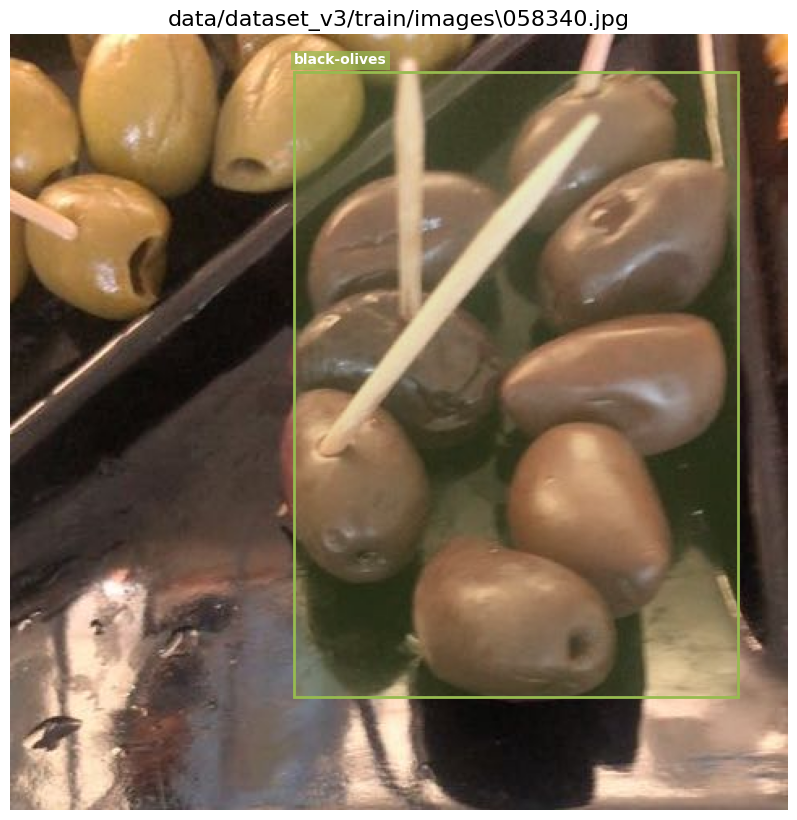

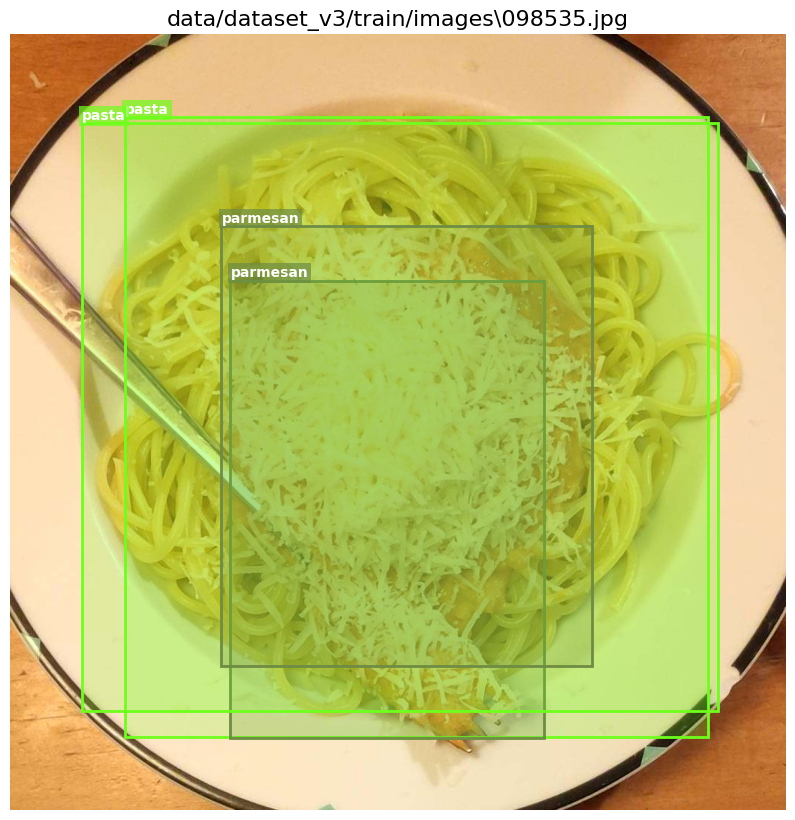

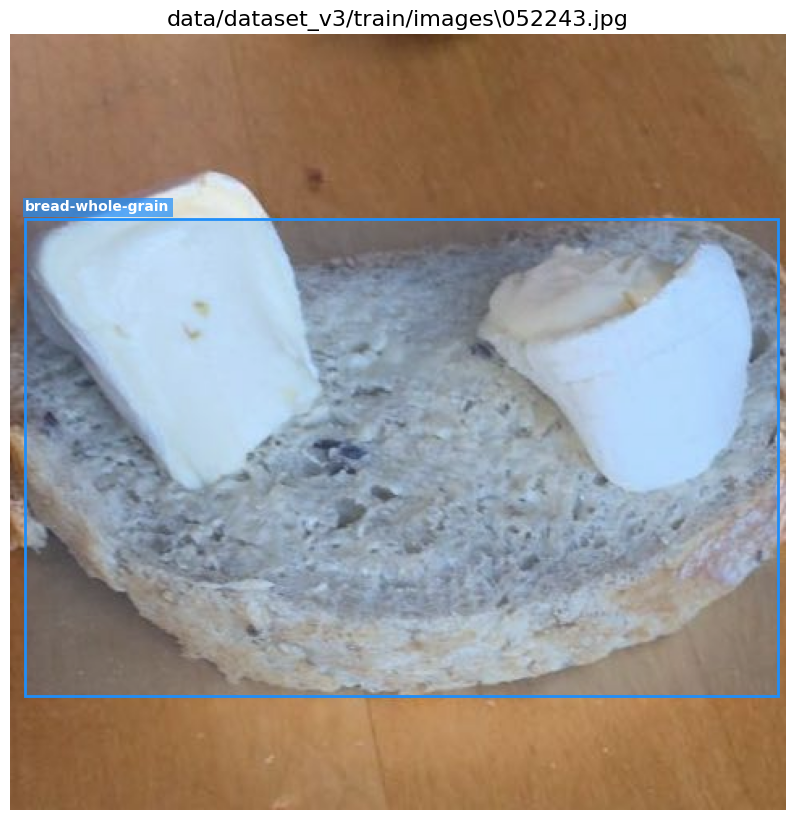

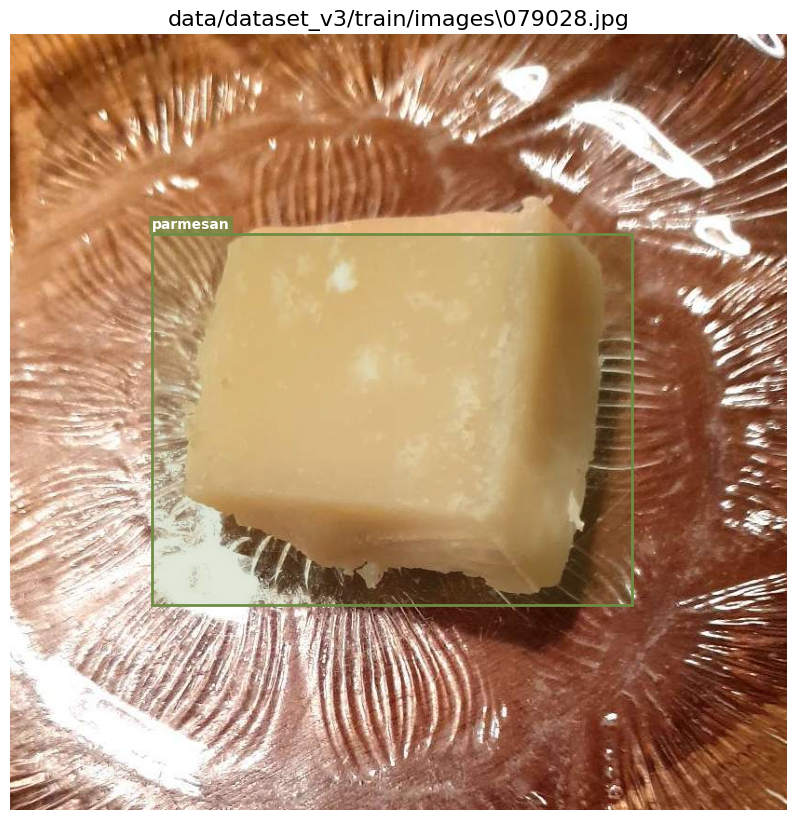

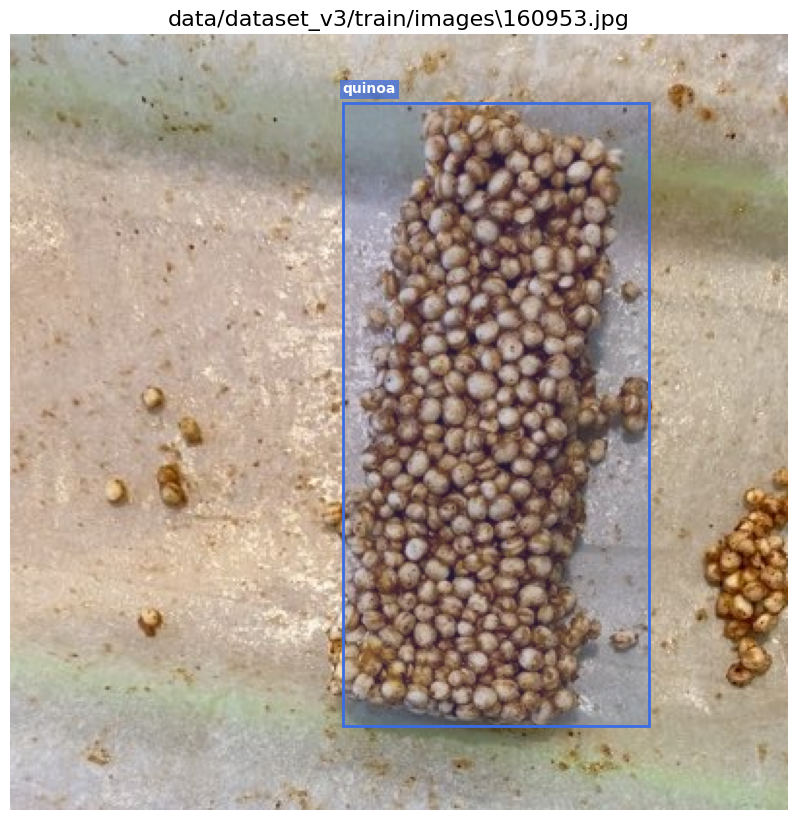

In [21]:
import random

## random shuffle of list of label files
label_files = [f for f in os.listdir(labels_train_dir) if f.endswith('.txt')]
random.shuffle(label_files)
for i in range(5):
    label_file = label_files[i]
    img_file = label_file.replace('.txt', '.jpg')
    img_path = os.path.join(img_train_dir, img_file)
    label_path = os.path.join(labels_train_dir, label_file)
    visualize_detections(img_path, label_path, new_id_to_name)

## Train val split

In [23]:
## 15% to val set

num_val = int(0.15 * len(label_files))
label_files = [f for f in os.listdir(labels_train_dir) if f.endswith('.txt')]
random.shuffle(label_files)
val_label_files = label_files[:num_val]
for label_file in val_label_files:
    img_file = label_file.replace('.txt', '.jpg')
    img_src_path = os.path.join(img_train_dir, img_file)
    img_dst_path = os.path.join(img_val_dir, img_file)
    os.rename(img_src_path, img_dst_path)

    label_src_path = os.path.join(labels_train_dir, label_file)
    label_dst_path = os.path.join(labels_val_dir, label_file)
    os.rename(label_src_path, label_dst_path)

### Multi class metrics prep

In [2]:
import os 

data_dir = "data/dataset_v4"
YOLO_train_labels_dir = os.path.join(data_dir, "train/labels")
YOLO_val_labels_dir = os.path.join(data_dir, "val/labels")

binary_labels_train_dir = os.path.join(data_dir, "train/binary_labels")
binary_labels_val_dir = os.path.join(data_dir, "val/binary_labels")

os.makedirs(binary_labels_train_dir, exist_ok=True)
os.makedirs(binary_labels_val_dir, exist_ok=True)

In [6]:
import json
with open ("pipeline_data/dicts/detect_classes_v4.json", "r") as f:
    detection_dict_v4 = json.load(f)

id_to_name_v4 = detection_dict_v4

num_classes = len(id_to_name_v4)

for label in os.listdir(YOLO_train_labels_dir):
    if label.endswith('.txt'):
        with open(os.path.join(YOLO_train_labels_dir, label), 'r') as f:
            lines = f.readlines()
        
        classes_occurred = set()
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            classes_occurred.add(class_id)

        classes = [0] * num_classes
        for class_id in classes_occurred:
            classes[class_id] = 1
        binary_label_file = os.path.join(binary_labels_train_dir, label)
        with open(binary_label_file, 'w') as f:
            f.write(" ".join(map(str, classes)))

for label in os.listdir(YOLO_val_labels_dir):
    if label.endswith('.txt'):
        with open(os.path.join(YOLO_val_labels_dir, label), 'r') as f:
            lines = f.readlines()
        
        classes_occurred = set()
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            classes_occurred.add(class_id)

        classes = [0] * num_classes
        for class_id in classes_occurred:
            classes[class_id] = 1
        binary_label_file = os.path.join(binary_labels_val_dir, label)
        with open(binary_label_file, 'w') as f:
            f.write(" ".join(map(str, classes)))


In [27]:
file = os.path.join(binary_labels_train_dir, "00000001.txt")

with open(file, 'r') as f:
    y_true = [int(x) for x in f.read().strip().split()]

print(y_true)  

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
